## Assessing risk factors linked to cardiovascular diseases among US population in the light of socioeconomic and geographic factors

## Questions:

1)	Is there a correlation between the prevalence of health risk factors (obesity, physical inactivity, cholesterol level, hypertension, smoking, and diabetes) and cardiovascular diseases (coronary heart disease, stroke, and heart attack)

2)	Does the variation of the prevalence of health risk factors and cardiovascular diseases in different states fit any model

3)	Is there any correlation between the prevalence of health risk factors and cardiovascular diseases in different states and their socioeconomic (education, GDP, household income, and healthcare spending) and geographic factors (climate and location)

4)	What is the rank of the prevalence of health risk factors and cardiovascular diseases dependent in different break out groups (age: 25-44, 45-64, 65+; gender: male and female; race/ethnicity: non-hispanic white, non-hispanic black, hispanic, and others)


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Importing data from Data.gov (https://catalog.data.gov/dataset/behavioral-risk-factor-data-heart-disease-amp-stroke-prevention) into a data frame
df = pd.DataFrame.from_csv(r'C:\Users\Igor\Jupyter_Notebook_Projects\Capstone project\Risk_Factor_vs_Heart_Disease_Simplified.csv', index_col=None)
df.head(1)

,Year,LocationAbbr,LocationDesc,Category,Topic,Indicator,Break_Out_Category,Break_out,Data_Value_Unit,Data_Value,Data_Value_Footnote,Confidence_Limit_Low,Confidence_Limit_High,IndicatorID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,NV,Nevada,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Age,25-44,%,NaN,Statistically unstable estimates not presented...,NaN,NaN,BR001,BOC03,AGE04,32.0,"(39.493240390000494, -117.07184056399967)"


## Data Wrangling

In [4]:
# Cleaning data: removing repetitive age categories, 'Nutrition' topic, 'Overall' break_out and
# average US LocationID rows, selecting year
a = df.Break_out != '35+'
b = df.Break_out != '75+'
c = df.Break_out != '20-24'
d = df.Year == 2013
g = df.Break_out != 'Overall'
h = df.LocationID != 0.5
i = df.Topic != 'Nutrition'
df1 = df[(a) & (b) & (c) & (d) & (g) & (h) & (i)] # creating a new df1

In [5]:
# Cleaning data: removing repetitive indicators and creating a new df2
list = ('post-hospitalization', 'Objective 6', 'Objective 7', 'screening', 'Objective 5', 'Objective 11', 'hypertension medication', 'Objective 8', 'Objective 9')
df2 = df1[~df.Indicator.str.contains('|'.join(list))]

C:\Users\Igor\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [6]:
# Cleaning data: ren=moving rows with NaN Data_Values and creating a new df3
df3 = df2.dropna(subset=['Data_Value'])

In [7]:
# Comparing the number of rows in data frames after cleaning
print(len(df))
print(len(df1))
print(len(df2))
print(len(df3))

35004
9079
4641
3886


In [8]:
# Checking df3
df3.head(1)

,Year,LocationAbbr,LocationDesc,Category,Topic,Indicator,Break_Out_Category,Break_out,Data_Value_Unit,Data_Value,Data_Value_Footnote,Confidence_Limit_Low,Confidence_Limit_High,IndicatorID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
744,2013,NJ,New Jersey,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Age,25-44,%,0.6,NaN,0.4,1.0,BR001,BOC03,AGE04,34.0,"(40.13057004800049, -74.27369128799967)"


## Data Analysis: CVDs and Risk Factors vs states

In [9]:
# Selecting 8 states with lowest combined prevalence of 6 risk factors
df3.groupby(['LocationDesc', 'Topic']).Data_Value.mean().unstack().sort_values(['Smoking', 'Obesity', 'Hypertension', 'Physical Inactivity', 'Diabetes', 'Cholesterol Abnormalities']).head(8)

Topic,Acute Myocardial Infarction (Heart Attack),Cholesterol Abnormalities,Coronary Heart Disease,Diabetes,Hypertension,Obesity,Physical Inactivity,Smoking,Stroke
LocationDesc,,,,,,,,,
Utah,4.350000,35.290000,3.966667,10.877778,28.150000,26.640000,22.640000,11.666667,2.850000
California,4.033333,37.830000,3.537500,12.544444,30.440000,26.250000,21.680000,12.927273,2.644444
Hawaii,3.728571,34.140000,3.314286,9.037500,28.390000,25.988889,21.666667,13.588889,3.400000
New Jersey,4.466667,39.560000,4.250000,10.488889,30.830000,27.890000,27.740000,15.000000,3.112500
Maryland,4.742857,37.350000,4.466667,11.522222,31.970000,27.470000,25.650000,16.300000,3.314286
Texas,5.262500,37.110000,5.328571,12.444444,33.060000,30.600000,28.770000,16.372727,3.112500
Washington,4.742857,34.900000,5.928571,10.522222,30.960000,29.210000,21.350000,16.527273,3.580000
Arizona,5.300000,39.655556,5.460000,12.622222,34.522222,31.266667,27.080000,16.811111,3.720000


In [10]:
# Selecting 8 states with highest combined prevalence of 6 risk factors
df3.groupby(['LocationDesc', 'Topic']).Data_Value.mean().unstack().sort_values(['Smoking', 'Obesity', 'Hypertension', 'Physical Inactivity', 'Diabetes', 'Cholesterol Abnormalities']).tail(8)

Topic,Acute Myocardial Infarction (Heart Attack),Cholesterol Abnormalities,Coronary Heart Disease,Diabetes,Hypertension,Obesity,Physical Inactivity,Smoking,Stroke
LocationDesc,,,,,,,,,
Tennessee,7.542857,37.637500,8.066667,13.557143,40.35,35.671429,35.855556,23.712500,4.542857
Oklahoma,6.000000,39.510000,5.850000,13.088889,37.28,32.450000,33.600000,24.420000,4.112500
North Dakota,5.900000,35.622222,5.920000,10.842857,30.80,33.062500,27.222222,24.800000,3.420000
Arkansas,6.383333,41.210000,7.357143,12.914286,37.14,35.166667,33.970000,24.830000,5.771429
Ohio,6.375000,37.990000,5.716667,12.155556,31.64,30.722222,27.910000,25.670000,4.462500
Mississippi,5.728571,40.340000,6.350000,14.900000,39.36,38.177778,37.740000,25.844444,5.157143
Kentucky,6.742857,40.770000,6.557143,11.885714,37.04,35.233333,28.860000,27.020000,4.685714
West Virginia,8.383333,39.870000,7.900000,14.162500,39.96,38.466667,29.622222,29.970000,4.133333


In [11]:
# Selecting 8 states with lowest combined prevalence of three cardiovascular diseases
df3.groupby(['LocationDesc', 'Topic']).Data_Value.mean().unstack().sort_values(['Acute Myocardial Infarction (Heart Attack)', 'Coronary Heart Disease', 'Stroke']).head(8)

Topic,Acute Myocardial Infarction (Heart Attack),Cholesterol Abnormalities,Coronary Heart Disease,Diabetes,Hypertension,Obesity,Physical Inactivity,Smoking,Stroke
LocationDesc,,,,,,,,,
Hawaii,3.728571,34.14,3.314286,9.037500,28.39,25.988889,21.666667,13.588889,3.400000
Colorado,3.987500,34.29,3.200000,8.677778,28.25,23.000000,19.040000,19.290909,2.185714
California,4.033333,37.83,3.537500,12.544444,30.44,26.250000,21.680000,12.927273,2.644444
Massachussettes,4.133333,37.69,4.025000,10.633333,29.78,27.710000,25.350000,18.318182,2.700000
Virginia,4.328571,39.09,5.428571,11.477778,31.49,27.520000,26.650000,19.027273,3.171429
Minnesota,4.340000,33.70,4.440000,9.362500,28.05,26.400000,25.640000,21.120000,2.466667
Utah,4.350000,35.29,3.966667,10.877778,28.15,26.640000,22.640000,11.666667,2.850000
New Jersey,4.466667,39.56,4.250000,10.488889,30.83,27.890000,27.740000,15.000000,3.112500


In [12]:
# Selecting 8 states with highest combined prevalence of three cardiovascular diseases
df3.groupby(['LocationDesc', 'Topic']).Data_Value.mean().unstack().sort_values(['Acute Myocardial Infarction (Heart Attack)', 'Coronary Heart Disease', 'Stroke']).tail(8)

Topic,Acute Myocardial Infarction (Heart Attack),Cholesterol Abnormalities,Coronary Heart Disease,Diabetes,Hypertension,Obesity,Physical Inactivity,Smoking,Stroke
LocationDesc,,,,,,,,,
Missouri,6.600000,34.888889,5.850000,11.425000,31.76,33.866667,28.080000,23.320000,3.900000
Kentucky,6.742857,40.770000,6.557143,11.885714,37.04,35.233333,28.860000,27.020000,4.685714
Louisianna,7.133333,41.844444,6.533333,13.357143,38.20,34.022222,31.380000,22.200000,5.000000
Alabama,7.216667,41.922222,6.666667,15.414286,37.44,34.100000,30.810000,21.666667,5.214286
Maine,7.233333,40.560000,6.140000,11.457143,30.85,33.575000,22.625000,23.175000,2.980000
Tennessee,7.542857,37.637500,8.066667,13.557143,40.35,35.671429,35.855556,23.712500,4.542857
South Dakota,7.550000,36.162500,6.416667,12.537500,29.91,31.466667,24.770000,21.533333,4.016667
West Virginia,8.383333,39.870000,7.900000,14.162500,39.96,38.466667,29.622222,29.970000,4.133333


In [13]:
# Visualizing CVDs vs states
# Creating a new data frame 'cd'  
cd = df3[df3.Category == 'Cardiovascular Diseases']

In [14]:
# Determining average number of data samples for the above 'Category' for states 
cd[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').size().mean()

19.529411764705884

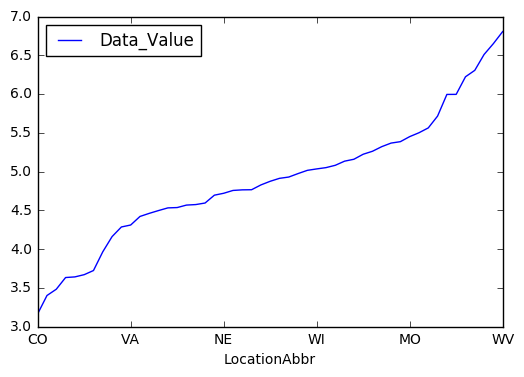

In [15]:
# Plotting sorted combined prevalence of CVDs for all states  
cd[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').mean().sort_values(by='Data_Value').plot()

In [16]:
# Visualizing 'Risk Factors' vs states
# Creating a new data frame 'rf'  
rf = df3[df3.Category == 'Risk Factors']

In [17]:
# Determining average number of data samples for the above 'Category' for states 
rf[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').size().mean()

56.666666666666664

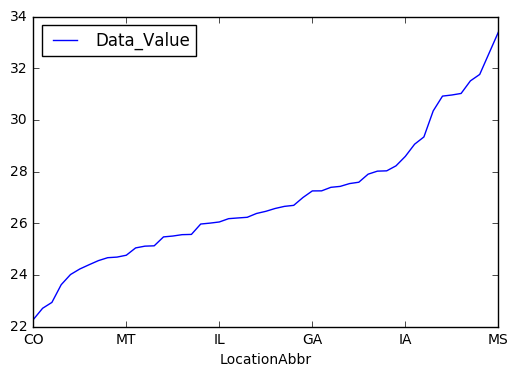

In [18]:
# Plotting sorted combined prevalence of 'Risk Factors' for all states 
rf[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').mean().sort_values(by='Data_Value').plot()

In [19]:
# Visualizing CVDs vs states for age '45-64'
# Creating a new data frame 'cda2' 
cda3 = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == '45-64')]

In [20]:
# Determining average number of data samples for the above category and age for states
cda3[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').size().mean()

3.0

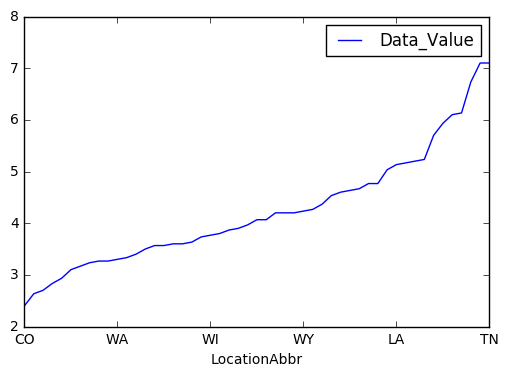

In [21]:
# Plotting sorted combined prevalence of CVDs in age group 45-64 for all states 
cda3[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').mean().sort_values(by='Data_Value').plot()

In [22]:
# Visualizing CVDs vs states for males
# Creating a new data frame 'cdm' 
cdm = df3[(df3.Category == 'Cardiovascular Diseases') & (df3.Break_out == 'Male')]

In [23]:
# Determining average number of data samples for the above category and gender for states
cdm[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').size().mean()

3.0

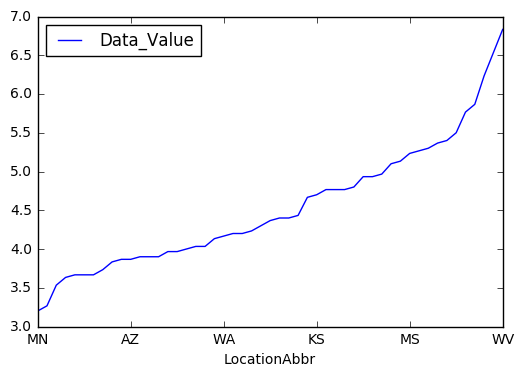

In [24]:
# Plotting sorted combined prevalence of CVDs in males for all states 
cdm[['LocationAbbr', 'Data_Value']].groupby('LocationAbbr').mean().sort_values(by='Data_Value').plot()

## Data Analysis: CVDs and Risk Factors vs break out groups (age, gender, race)

In [25]:
# Ranking combined prevalence of three CVDs in different break out groups
df3.groupby(['Break_out', 'Topic']).Data_Value.mean().unstack().sort_values(['Acute Myocardial Infarction (Heart Attack)', 'Coronary Heart Disease', 'Stroke']).dropna()

Topic,Acute Myocardial Infarction (Heart Attack),Cholesterol Abnormalities,Coronary Heart Disease,Diabetes,Hypertension,Obesity,Physical Inactivity,Smoking,Stroke
Break_out,,,,,,,,,
25-44,1.170370,22.029412,0.942857,3.547059,16.972549,29.562745,23.007843,23.611765,1.052000
Female,2.921569,33.215686,3.084314,8.929412,29.037255,29.039216,26.635294,17.796078,2.827451
Non-Hispanic White,4.082353,35.098039,3.949020,8.117647,30.084314,27.468627,23.633333,19.994118,2.650000
Non-Hispanic Black,4.462069,36.012766,4.250000,15.377500,42.100000,39.295652,31.686047,22.807317,4.353571
Hispanic,4.550000,36.915686,3.916667,13.842857,30.432000,33.908163,31.562500,17.036957,2.440000
45-64,4.856863,45.280392,4.576471,12.825490,40.764706,33.501961,27.966667,20.613725,3.284314
Male,5.721569,37.411765,5.041176,9.956863,34.170588,29.492157,24.492157,21.623529,2.843137
Other,6.810000,34.541463,5.364286,13.230952,30.188235,14.320000,27.164000,11.150000,4.709091
65+,12.527451,55.756863,12.335294,21.137255,62.568627,26.556863,32.725490,9.005882,7.796078


In [26]:
# Ranking combined prevalence of 6 risk factors in different break out groups
df3.groupby(['Break_out', 'Topic']).Data_Value.mean().unstack().sort_values(['Smoking', 'Obesity', 'Hypertension', 'Physical Inactivity', 'Diabetes', 'Cholesterol Abnormalities']).dropna()

Topic,Acute Myocardial Infarction (Heart Attack),Cholesterol Abnormalities,Coronary Heart Disease,Diabetes,Hypertension,Obesity,Physical Inactivity,Smoking,Stroke
Break_out,,,,,,,,,
65+,12.527451,55.756863,12.335294,21.137255,62.568627,26.556863,32.725490,9.005882,7.796078
Other,6.810000,34.541463,5.364286,13.230952,30.188235,14.320000,27.164000,11.150000,4.709091
Hispanic,4.550000,36.915686,3.916667,13.842857,30.432000,33.908163,31.562500,17.036957,2.440000
Female,2.921569,33.215686,3.084314,8.929412,29.037255,29.039216,26.635294,17.796078,2.827451
Non-Hispanic White,4.082353,35.098039,3.949020,8.117647,30.084314,27.468627,23.633333,19.994118,2.650000
45-64,4.856863,45.280392,4.576471,12.825490,40.764706,33.501961,27.966667,20.613725,3.284314
Male,5.721569,37.411765,5.041176,9.956863,34.170588,29.492157,24.492157,21.623529,2.843137
Non-Hispanic Black,4.462069,36.012766,4.250000,15.377500,42.100000,39.295652,31.686047,22.807317,4.353571
25-44,1.170370,22.029412,0.942857,3.547059,16.972549,29.562745,23.007843,23.611765,1.052000


## Data analysis: CVDs vs risk factors

In [27]:
# Creating new data frames for risk factors and CVDs including location ID which is to be used a key for merging
# Grouping by state and calculatinh mean combined prevalence values for each state
rf1 = df3[(df3.Category == 'Risk Factors')][['LocationID', 'LocationDesc', 'Data_Value']].groupby('LocationDesc').mean()
cd1 = df3[df3.Category == 'Cardiovascular Diseases'][['LocationID', 'LocationDesc', 'Data_Value']].groupby('LocationDesc').mean()

In [28]:
# Merging data frames
dep = pd.merge(cd1, rf1, on='LocationID', how='inner')#[['Data_Value_x', 'Data_Value_y']]
dep.head()

,LocationID,Data_Value_x,Data_Value_y
0,1.0,6.305263,30.918519
1,2.0,4.566667,27.387719
2,4.0,4.826667,26.994545
3,5.0,6.510000,31.757143
4,6.0,3.400000,23.618333


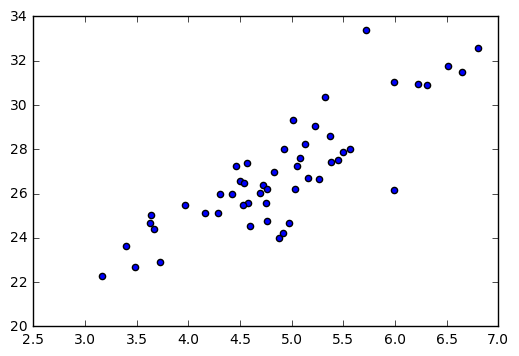

In [29]:
# Scatter plot of the relationship between average prevalence of risk factors (y) and CVDs (x) (RFs as a function of CVDs)
plt.scatter(dep.Data_Value_x, dep.Data_Value_y)

## Data analysis: socioeconomic and geographic factors vs prevalence of CVDs

In [30]:
# Importing data from a csv file to a data frame
us_df = pd.DataFrame.from_csv(r'C:\Users\Igor\Jupyter_Notebook_Projects\Capstone project\USA_info.csv', index_col=None, encoding='cp1252')
us_df.head()

,LocationID,LocationDesc,GDP_2012,Healthcare_spending_2009,Bachelor_degree,Advanced_degree,Median_household_income_2014,Average_annual_Temp_C,Latitude,Longitude
0,1,Alabama,32615,6271.67,0.235,0.087,41415,17.1,32.806671,-86.791130
1,2,Alaska,61156,9127.65,0.280,0.110,60287,-3.0,61.370716,-152.404419
2,4,Arizona,35195,5433.89,0.275,0.102,46709,15.7,33.729759,-111.431221
3,5,Arkansas,31837,6166.94,0.211,0.075,38758,15.8,34.969704,-92.373123
4,6,California,46029,6237.61,0.314,0.116,67458,15.2,36.116203,-119.681564


In [31]:
# Merging cd1 and us_df data frames
df_cd1_us_merged = pd.merge(cd1, us_df, on='LocationID', how='inner')
df_cd1_us_merged.head()

,LocationID,Data_Value,LocationDesc,GDP_2012,Healthcare_spending_2009,Bachelor_degree,Advanced_degree,Median_household_income_2014,Average_annual_Temp_C,Latitude,Longitude
0,1.0,6.305263,Alabama,32615,6271.67,0.235,0.087,41415,17.1,32.806671,-86.791130
1,2.0,4.566667,Alaska,61156,9127.65,0.280,0.110,60287,-3.0,61.370716,-152.404419
2,4.0,4.826667,Arizona,35195,5433.89,0.275,0.102,46709,15.7,33.729759,-111.431221
3,5.0,6.510000,Arkansas,31837,6166.94,0.211,0.075,38758,15.8,34.969704,-92.373123
4,6.0,3.400000,California,46029,6237.61,0.314,0.116,67458,15.2,36.116203,-119.681564


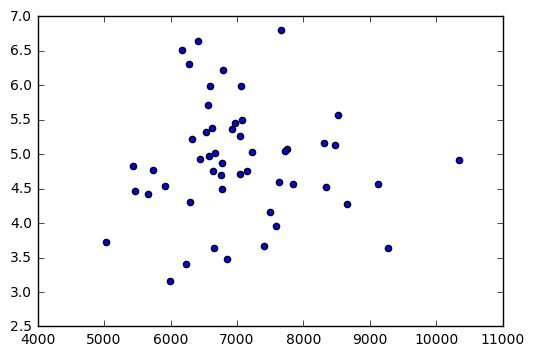

In [32]:
# Prevance of CVDs as a function of healthcare spending 
plt.scatter(df_cd1_us_merged.Healthcare_spending_2009, df_cd1_us_merged.Data_Value)

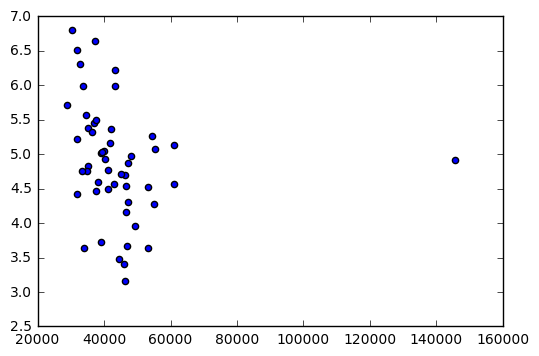

In [33]:
# Prevance of CVDs as a function of GDP 
plt.scatter(df_cd1_us_merged.GDP_2012, df_cd1_us_merged.Data_Value)

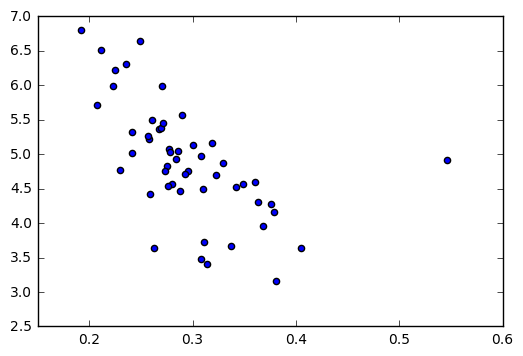

In [34]:
# Prevance of CVDs as a function of education 
plt.scatter(df_cd1_us_merged.Bachelor_degree, df_cd1_us_merged.Data_Value)

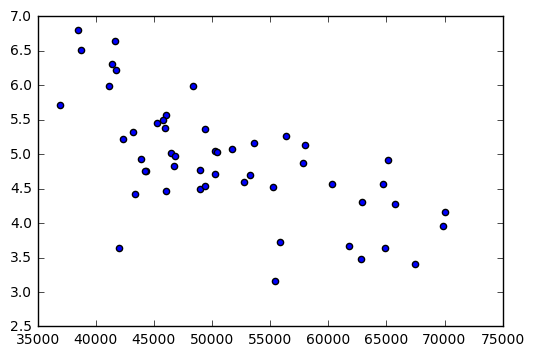

In [35]:
# Prevance of CVDs as a function of median household income 
plt.scatter(df_cd1_us_merged.Median_household_income_2014, df_cd1_us_merged.Data_Value)

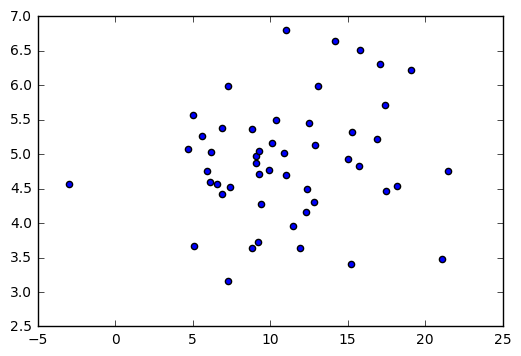

In [36]:
# Prevance of CVDs as a function of average annual temperature 
plt.scatter(df_cd1_us_merged.Average_annual_Temp_C, df_cd1_us_merged.Data_Value)

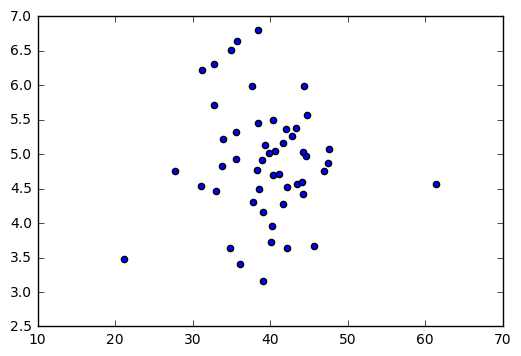

In [37]:
# Prevance of CVDs as a function of latitude 
plt.scatter(df_cd1_us_merged.Latitude, df_cd1_us_merged.Data_Value)

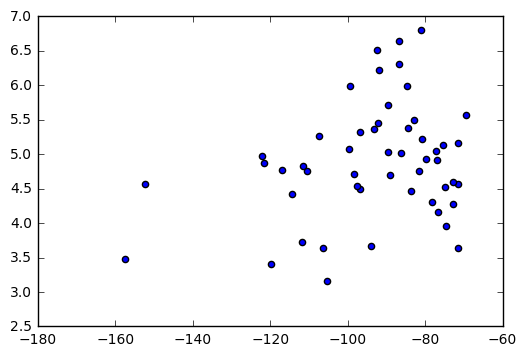

In [38]:
# Prevance of CVDs as a function of longtitude 
plt.scatter(df_cd1_us_merged.Longitude, df_cd1_us_merged.Data_Value)

## Data analysis: socioeconomic and geographic factors vs prevalence of risk factors

In [39]:
# Merging rf1 and us_df data frames
df_rf1_us_merged = pd.merge(rf1, us_df, on='LocationID', how='inner')
df_rf1_us_merged.head()

,LocationID,Data_Value,LocationDesc,GDP_2012,Healthcare_spending_2009,Bachelor_degree,Advanced_degree,Median_household_income_2014,Average_annual_Temp_C,Latitude,Longitude
0,1.0,30.918519,Alabama,32615,6271.67,0.235,0.087,41415,17.1,32.806671,-86.791130
1,2.0,27.387719,Alaska,61156,9127.65,0.280,0.110,60287,-3.0,61.370716,-152.404419
2,4.0,26.994545,Arizona,35195,5433.89,0.275,0.102,46709,15.7,33.729759,-111.431221
3,5.0,31.757143,Arkansas,31837,6166.94,0.211,0.075,38758,15.8,34.969704,-92.373123
4,6.0,23.618333,California,46029,6237.61,0.314,0.116,67458,15.2,36.116203,-119.681564


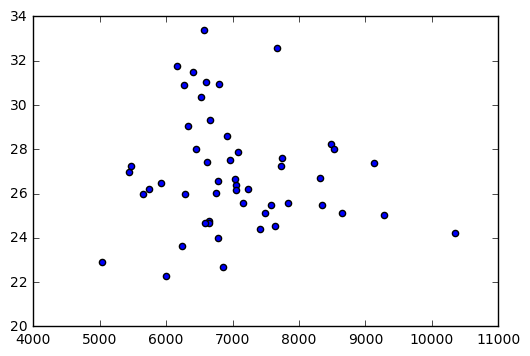

In [43]:
# Prevance of RFs as a function of healthcare spending 
plt.scatter(df_rf1_us_merged.Healthcare_spending_2009, df_rf1_us_merged.Data_Value)

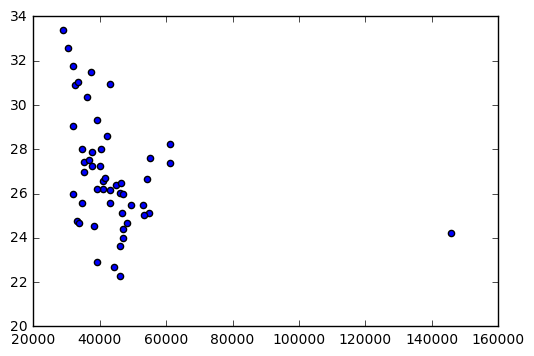

In [44]:
# Prevance of CVDs as a function of GDP 
plt.scatter(df_rf1_us_merged.GDP_2012, df_rf1_us_merged.Data_Value)

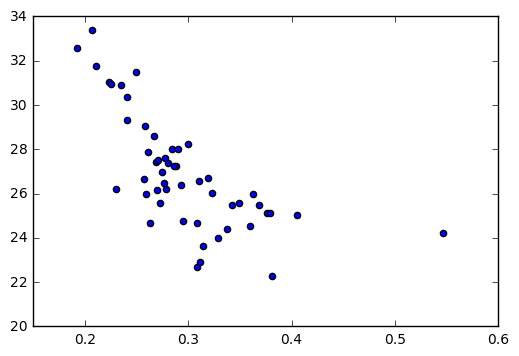

In [45]:
# Prevance of RFs as a function of education 
plt.scatter(df_rf1_us_merged.Bachelor_degree, df_rf1_us_merged.Data_Value)

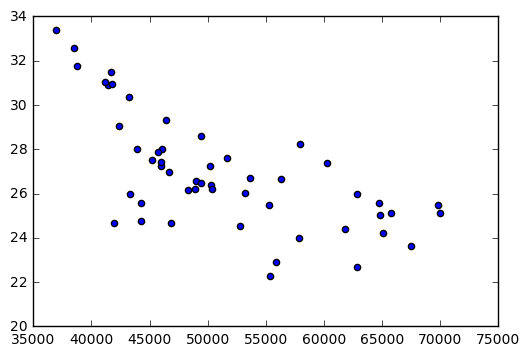

In [46]:
# Prevance of RFs as a function of median household income 
plt.scatter(df_rf1_us_merged.Median_household_income_2014, df_rf1_us_merged.Data_Value)

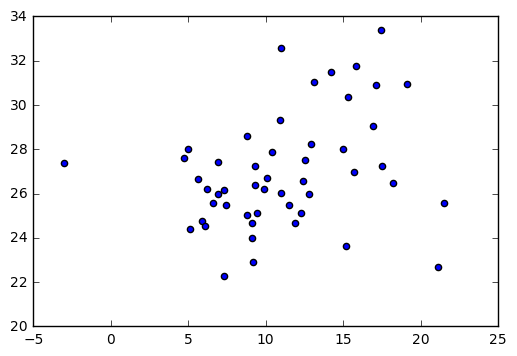

In [47]:
# Prevance of RFs as a function of average annual temperature 
plt.scatter(df_rf1_us_merged.Average_annual_Temp_C, df_rf1_us_merged.Data_Value)

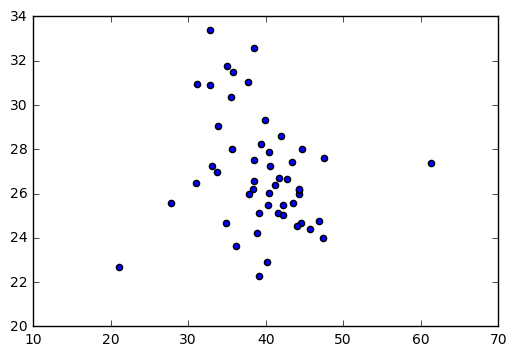

In [48]:
# Prevance of RFs as a function of latitude 
plt.scatter(df_rf1_us_merged.Latitude, df_rf1_us_merged.Data_Value)

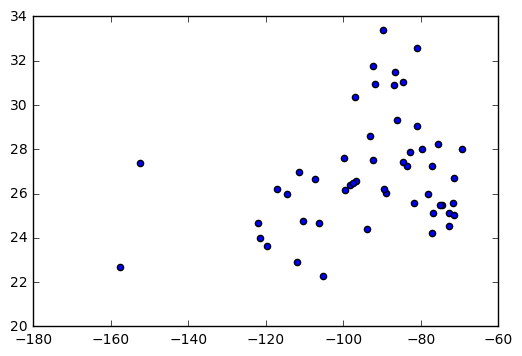

In [49]:
# Prevance of RFs as a function of longtitude 
plt.scatter(df_rf1_us_merged.Longitude, df_rf1_us_merged.Data_Value)

## Preliminary findings:

The findings below are preliminary and still need to be proved by statistical analysis.

1)	It is interesting that variation of the prevalence of both health risk factors and cardiovascular diseases in different states can be modelled by a logistic model.

2)	As expected, there is a linear dependence between the prevalence of health risk factors and cardiovascular diseases.

3)	The rank (lowest to highest) of the prevalence of cardiovascular diseases in different break out groups is the following: 25-44, female, non-hispanic white, non-hispanic black, Hispanic, 45-64, male, other, 65+. The rank for risk factors needs to be analyzed.

4)	Surprisingly, there is no or very little dependence between healthcare spending and the prevalence of cardiovascular diseases and risk factors. However, the higher GDP, the level of education or household income, the lower is the prevalence of cardiovascular diseases and risk factors.

5)	Climate is not crucial in defining the prevalence of cardiovascular diseases and risk factors as well as the latitude, though western states have slightly higher prevalence of cardiovascular diseases.

## Conclusions:

It seems that socioeconomic factors determine the prevalence of risk factors and, as a result, cardiovascular diseases among U.S. population. The U.S. healthcare system is not effective in preventing cardiovascular diseases, since it does not affect the socioeconomic level of population. More money should be spent on increasing public knowledge and awareness of cardiovascular diseases and awareness of their associated risk factors as well as lifestyle modification.
